## This is the softmax workbook for ECE 239AS Assignment #2

Please follow the notebook linearly to implement a softmax classifier.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a softmax classifier.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Training a softmax classifier.

The following cells will take you through building a softmax classifier.  You will implement its loss function, then subsequently train it with gradient descent.  Finally, you will choose the learning rate of gradient descent to optimize its classification performance.

In [3]:
from nndl import Softmax

In [21]:
# Declare an instance of the Softmax class.  
# Weights are initialized to a random value.
# Note, to keep people's first solutions consistent, we are going to use a random seed.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])

#### Softmax loss

In [22]:
## Implement the loss function of the softmax using a for loop over
#  the number of examples

loss = softmax.loss(X_train, y_train)

In [23]:
print(loss)

2.3277607028048966


## Question: 

You'll notice the loss returned by the softmax is about 2.3 (if implemented correctly).  Why does this value make sense?

## Answer:

Since we have generated initial W from a normal distribution, this assigns each data point, on average, to each class equally likely and hence we expect that all class scores and coressponding exponentials on the same order and similar. Hence each term in the loss function can be approximated by:

\begin{align}
Loss = \frac{1}{m}\sum_{i=1}^{m} \big(\log \sum_{j=1}^{c}\exp^{a_{j}(x)} - a_{y^{(i)}}(x^{(i)}) \big) \approx \frac{1}{m} \sum_{i=1}^{m} \big( \log(c) + a_{y^{(i)}}(x^{(i)}) - a_{y^{(i)}}(x^{(i)}) \big) = \ln(c) = \ln(10) \approx 2.3 \\
\end{align}

#### Softmax gradient

In [12]:
## Calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss
#   and gradient together, softmax.loss_and_grad(X, y)
# You may copy and paste your loss code from softmax.loss() here, and then
#   use the appropriate intermediate values to calculate the gradient.

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Compare your gradient to a gradient check we wrote. 
# You should see relative gradient errors on the order of 1e-07 or less if you implemented the gradient correctly.
softmax.grad_check_sparse(X_dev, y_dev, grad)

numerical: 1.217249 analytic: 1.217248, relative error: 4.557511e-08
numerical: 0.046448 analytic: 0.046448, relative error: 2.843581e-07
numerical: 2.457286 analytic: 2.457286, relative error: 4.088560e-09
numerical: 1.909221 analytic: 1.909221, relative error: 3.183455e-08
numerical: -0.701150 analytic: -0.701150, relative error: 6.247204e-08
numerical: 0.376225 analytic: 0.376225, relative error: 9.460772e-08
numerical: 1.464865 analytic: 1.464865, relative error: 1.364491e-08
numerical: 2.896573 analytic: 2.896573, relative error: 2.137011e-08
numerical: 2.125920 analytic: 2.125920, relative error: 2.336915e-09
numerical: 2.291406 analytic: 2.291406, relative error: 1.930837e-08


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [13]:
import time

In [14]:
## Implement softmax.fast_loss_and_grad which calculates the loss and gradient
#    WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

# You should notice a speedup with the same output.

Normal loss / grad_norm: 2.3412243834931 / 354.2632504124683 computed in 0.23025226593017578s
Vectorized loss / grad: 2.3412243834930972 / 354.2632504124684 computed in 0.01799798011779785s
difference in loss / grad: 2.6645352591003757e-15 /2.3977170511309566e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.  This uses the same principles of gradient descent we discussed in class, however, it calculates the gradient by only using examples from a subset of the training set (so each gradient calculation is faster).

## Question:

How should the softmax gradient descent training step differ from the svm training step, if at all?

## Answer:

The gradient descent algorithm is not different for SVM and softmax. In fact in both we have the same gradient descenet formulation for updating W matrix which is: next = current - (learning rate) * gradient. The difference though is in finding the gradient since SVM and softmax have different loss functions and hence the stage for calculation gradient of this loss function with respect to W will be different while the general formulation of the gradient descenet is the same.

iteration 0 / 1500: loss 2.296488526280271
iteration 100 / 1500: loss 2.0660917384069237
iteration 200 / 1500: loss 1.984464582884246
iteration 300 / 1500: loss 2.021877859713946
iteration 400 / 1500: loss 1.8812306259936602
iteration 500 / 1500: loss 1.8444950123567299
iteration 600 / 1500: loss 1.8409900570791933
iteration 700 / 1500: loss 1.864696992640151
iteration 800 / 1500: loss 1.710680462299075
iteration 900 / 1500: loss 1.9259869402188243
iteration 1000 / 1500: loss 1.9948055367924393
iteration 1100 / 1500: loss 1.8801523046244102
iteration 1200 / 1500: loss 1.7531563591557147
iteration 1300 / 1500: loss 1.860891600642588
iteration 1400 / 1500: loss 1.8974208454862467
That took 11.110643863677979s


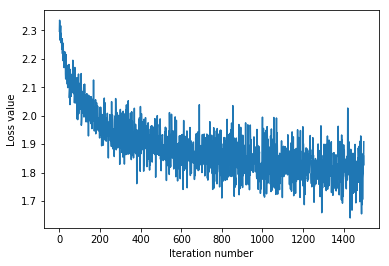

In [15]:
# Implement softmax.train() by filling in the code to extract a batch of data
# and perform the gradient step.
import time


tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [16]:
## Implement softmax.predict() and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print(y_train)
print(y_train_pred)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

[6 9 9 ... 4 9 3]
[6 1 9 ... 4 1 8]
training accuracy: 0.38185714285714284
validation accuracy: 0.389


## Optimize the softmax classifier

You may copy and paste your optimization code from the SVM here.

In [19]:
np.finfo(float).eps

2.220446049250313e-16

Best Learning Rate:  9.999999999999673e-07
Best Validation Accuracy:  0.409
Best Validation Error:  0.591
Test Accuracy:  0.399
Test Error:  0.601


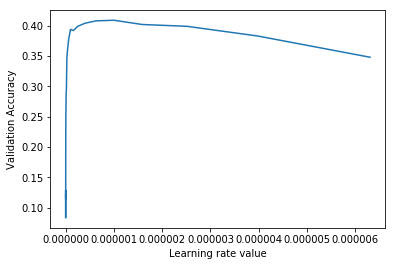

In [20]:
# ================================================================ #
# YOUR CODE HERE:
#   Train the Softmax classifier with different learning rates and 
#     evaluate on the validation data.
#   Report:
#     - The best learning rate of the ones you tested.  
#     - The best validation accuracy corresponding to the best validation error.
#
#   Select the SVM that achieved the best validation error and report
#     its error rate on the test set.
# ================================================================ #

Learning_rate = 10**np.arange(-10,-5,0.2) 
#print(Learning_rate)
accuracy_test = []

for Lr in Learning_rate:
    loss_hist = softmax.train(X_train, y_train, Lr, num_iters=1500, verbose=False)
    y_val_pred = softmax.predict(X_val)
    accuracy_test.append(np.mean(np.equal(y_val, y_val_pred)))
    
Learning_rate_best_index = np.argmax(accuracy_test)
Learning_rate_best = Learning_rate[Learning_rate_best_index]

softmax.train(X_train, y_train, Learning_rate_best, num_iters=1500, verbose=False)

y_est_test = softmax.predict(X_test)
accuracy_test_f = np.mean(np.equal(y_test, y_est_test))

best_valication_accuracy =  1 - accuracy_test[Learning_rate_best_index]
error_test = 1 - accuracy_test_f

plt.figure()
plt.plot(Learning_rate, accuracy_test)
plt.xlabel('Learning rate value')
plt.ylabel('Validation Accuracy')

print('Best Learning Rate: ', Learning_rate_best)
print('Best Validation Accuracy: ', accuracy_test[Learning_rate_best_index])
print('Best Validation Error: ', best_valication_accuracy)
print('Test Accuracy: ', accuracy_test_f)
print('Test Error: ', error_test)


# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
